## Equations

Construct the equations for the right side of the system.

### Setting up

In [157]:
from sympy import *

# Define symbolic variables
V_POC, I11, I12, I21, I22, I31, I32, P1, P2, V_A1, V_A2, V_B, V_S1, V_S2, Z11, Z12, Z21, Z22, Z31, Z32, Z41, Z42, Z5, Z6 = symbols('V_POC I11 I12 I21 I22 I31 I32 P1 P2 V_A1 V_A2 V_B V_S1 V_S2 Z11 Z12 Z21 Z22 Z31 Z32 Z41 Z42 Z5 Z6')

# Option for printing pretty equations
init_printing(use_unicode=True)

### Turbine 1

In [158]:
# Initial expression for V_B
eq1 = Eq(V_B, V_A1 - I21 * Z21)
eq1

In [159]:
# Substitute I21
I21 = I11 - V_A1 / Z31
eq1 = eq1.subs('I21', I21)
eq1

In [160]:
# substitute V_A1
V_A1 = V_S1 - I11 * Z11
eq1 = eq1.subs('V_A1', V_A1)
eq1

In [161]:
# substitute I11
I11 = P1 / V_S1
eq1 = eq1.subs('I11', I11)
eq1

In [162]:
eq1 = eq1.simplify()
eq1

In [163]:
# print right hand side in code format
print(eq1.rhs)

(-P1*Z11*Z31 + V_S1**2*Z31 - Z21*(P1*Z11 + P1*Z31 - V_S1**2))/(V_S1*Z31)


### Turbine 2
Turbine 2 circuit is symbolically identical, but with corresponding branch component names

In [164]:
eq2 = eq1.subs([(V_S1, V_S2), (Z31, Z32), (P1, P2), (V_S1,V_S2), (Z11,Z12), (Z21, Z22)])
eq2

### Point of Connection
The equation for $V_B$ as seen from $POC$

In [165]:
eq3 = Eq(V_POC, V_B - (I31 + I32) * Z5)
eq3

In [166]:
# substitute I31 and I32
I31 = I21 - V_B / Z41
I32 = I22 - V_B / Z42

eq3 = eq3.subs([('I31', I31), ('I32',I32)] )
eq3

In [167]:
# substitute I21 amd I22
I21 = I11 - V_A1 / Z21
I22 = I12 - V_A2 / Z22
eq3 = eq3.subs([('I21', I21), ('I22',I22)] )
eq3


In [168]:
# substitute V_A1 and V_A2
V_A1 = V_S1 - I11 * Z11
V_A2 = V_S2 - I12 * Z12
eq3 = eq3.subs([('V_A1', V_A1), ('V_A2',V_A2)] )
eq3

In [169]:
# substitute I11 and I12
I11 = P1 / V_S1
I12 = P2 / V_S2
eq3 = eq3.subs([('I11', I11), ('I12',I12)] )
eq3

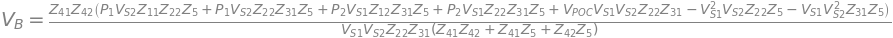

In [170]:
# Solve for VB
sol = solve(eq3, V_B)
eq3 = Eq(V_B, sol[0]).simplify()
eq3
#_rhs = solve(eq3.rhs - eq3.lhs, V_B)
#print(_rhs)
#eq3 = Eq(V_B, _rhs)


## Criteria functions
The three functions are:

In [171]:
eq1

In [172]:
eq2

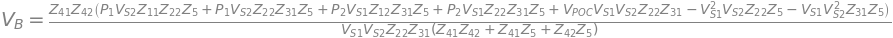

In [173]:
eq3

In [178]:
print(eq1.lhs, "=", eq1.rhs)
print(eq2.lhs, "=", eq2.rhs)
print(eq3.lhs, "=", eq3.rhs)

V_B = (-P1*Z11*Z31 + V_S1**2*Z31 - Z21*(P1*Z11 + P1*Z31 - V_S1**2))/(V_S1*Z31)
V_B = (-P2*Z12*Z32 + V_S2**2*Z32 - Z22*(P2*Z12 + P2*Z32 - V_S2**2))/(V_S2*Z32)
V_B = Z41*Z42*(P1*V_S2*Z11*Z22*Z5 + P1*V_S2*Z22*Z31*Z5 + P2*V_S1*Z12*Z31*Z5 + P2*V_S1*Z22*Z31*Z5 + V_POC*V_S1*V_S2*Z22*Z31 - V_S1**2*V_S2*Z22*Z5 - V_S1*V_S2**2*Z31*Z5)/(V_S1*V_S2*Z22*Z31*(Z41*Z42 + Z41*Z5 + Z42*Z5))
